## Workshop Week 6

## Logistic Regression
Breast Cancer data from [the UCI repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) contains records corresponding to 
cases of observed tumors.   There are a number of observations for each and a categorisation in the `class` column: 2 for benign (good), 4 for malignant (bad).  Your task is to build a logistic regression model to classify these cases. 

The data is provided as a CSV file.  There are a small number of cases where no value is available, these are indicated in the data with `?`. I have used the `na_values` keyword for `read_csv` to have these interpreted as `NaN` (Not a Number).  Your first task is to decide what to do with these rows. You could just drop these rows or you could [impute them from the other data](http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values).

You then need to follow the procedure outlined in the lecture for generating a train/test set, building and evaluating a model. Your goal is to build the best model possible over this data.   Your first step should be to build a logistic regression model using all of the features that are available.
  

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.feature_selection import RFE
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [22]:
bcancer = pd.read_csv("files/breast-cancer-wisconsin.csv", na_values="?")
bcancer.head()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [23]:
bcancer.isnull().sum().sum()

16

In [24]:
# Examine the data: check number of rows and number of columns
bcancer.shape

(699, 11)

There are 699 rows and 11 columns in the data frame

In [3]:
# Look at the statistical summary of the dataframe
bcancer.describe()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [170]:
# Check how many classes we do have from the "class" column
bcancer['class'].value_counts().count()

2

In [171]:
# Check number of samples for each class and comment whether dataset is balanced?
# bcancer.groupby(['class']).count()
bcancer['class'].value_counts()

2    444
4    239
Name: class, dtype: int64

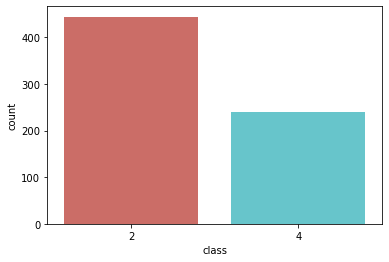

<Figure size 432x288 with 0 Axes>

In [172]:
sns.countplot(x='class', data=bcancer, palette ='hls')
plt.show()
plt.savefig('count_plot')

In [175]:
count_good = len(bcancer[bcancer['class']==2])
count_bad = len(bcancer[bcancer['class']==4])
pct_of_good = count_good/(count_good+count_bad)
print("Percentage of Good(2) is", pct_of_good*100)
pct_of_bad = count_bad/(count_good+count_bad)
print("Percentage of Bad(4) is", pct_of_bad*100)

Percentage of Good(2) is 65.00732064421669
Percentage of Bad(4) is 34.99267935578331


The class 2 has a total of 444 samples and the class 4, a total of 239 samples. The dataset is not balaced between the two classes. Class 2 with more than 60% of the observations. The Good(2) has a percetage of 65% and the Bad(4) a total percentage of 35%. Our classes are imbalanced, and the ratio of good to bad instances is 65:35.

In [176]:
# Deal with the NaN values in the data
bcancer = bcancer.dropna()
bcancer.head()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [177]:
bcancer.reset_index(drop=True)

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2.0,1,1,1,2
679,841769,2,1,1,1,2,1.0,1,1,1,2
680,888820,5,10,10,3,7,3.0,8,10,2,4
681,897471,4,8,6,4,3,4.0,10,6,1,4


In [178]:
bcancer.isnull().sum().sum()

0

In [179]:
bcancer.shape

(683, 11)

Dropping the rows with NaN values, the number of rows in the dataframe has been reduced to 683 rows

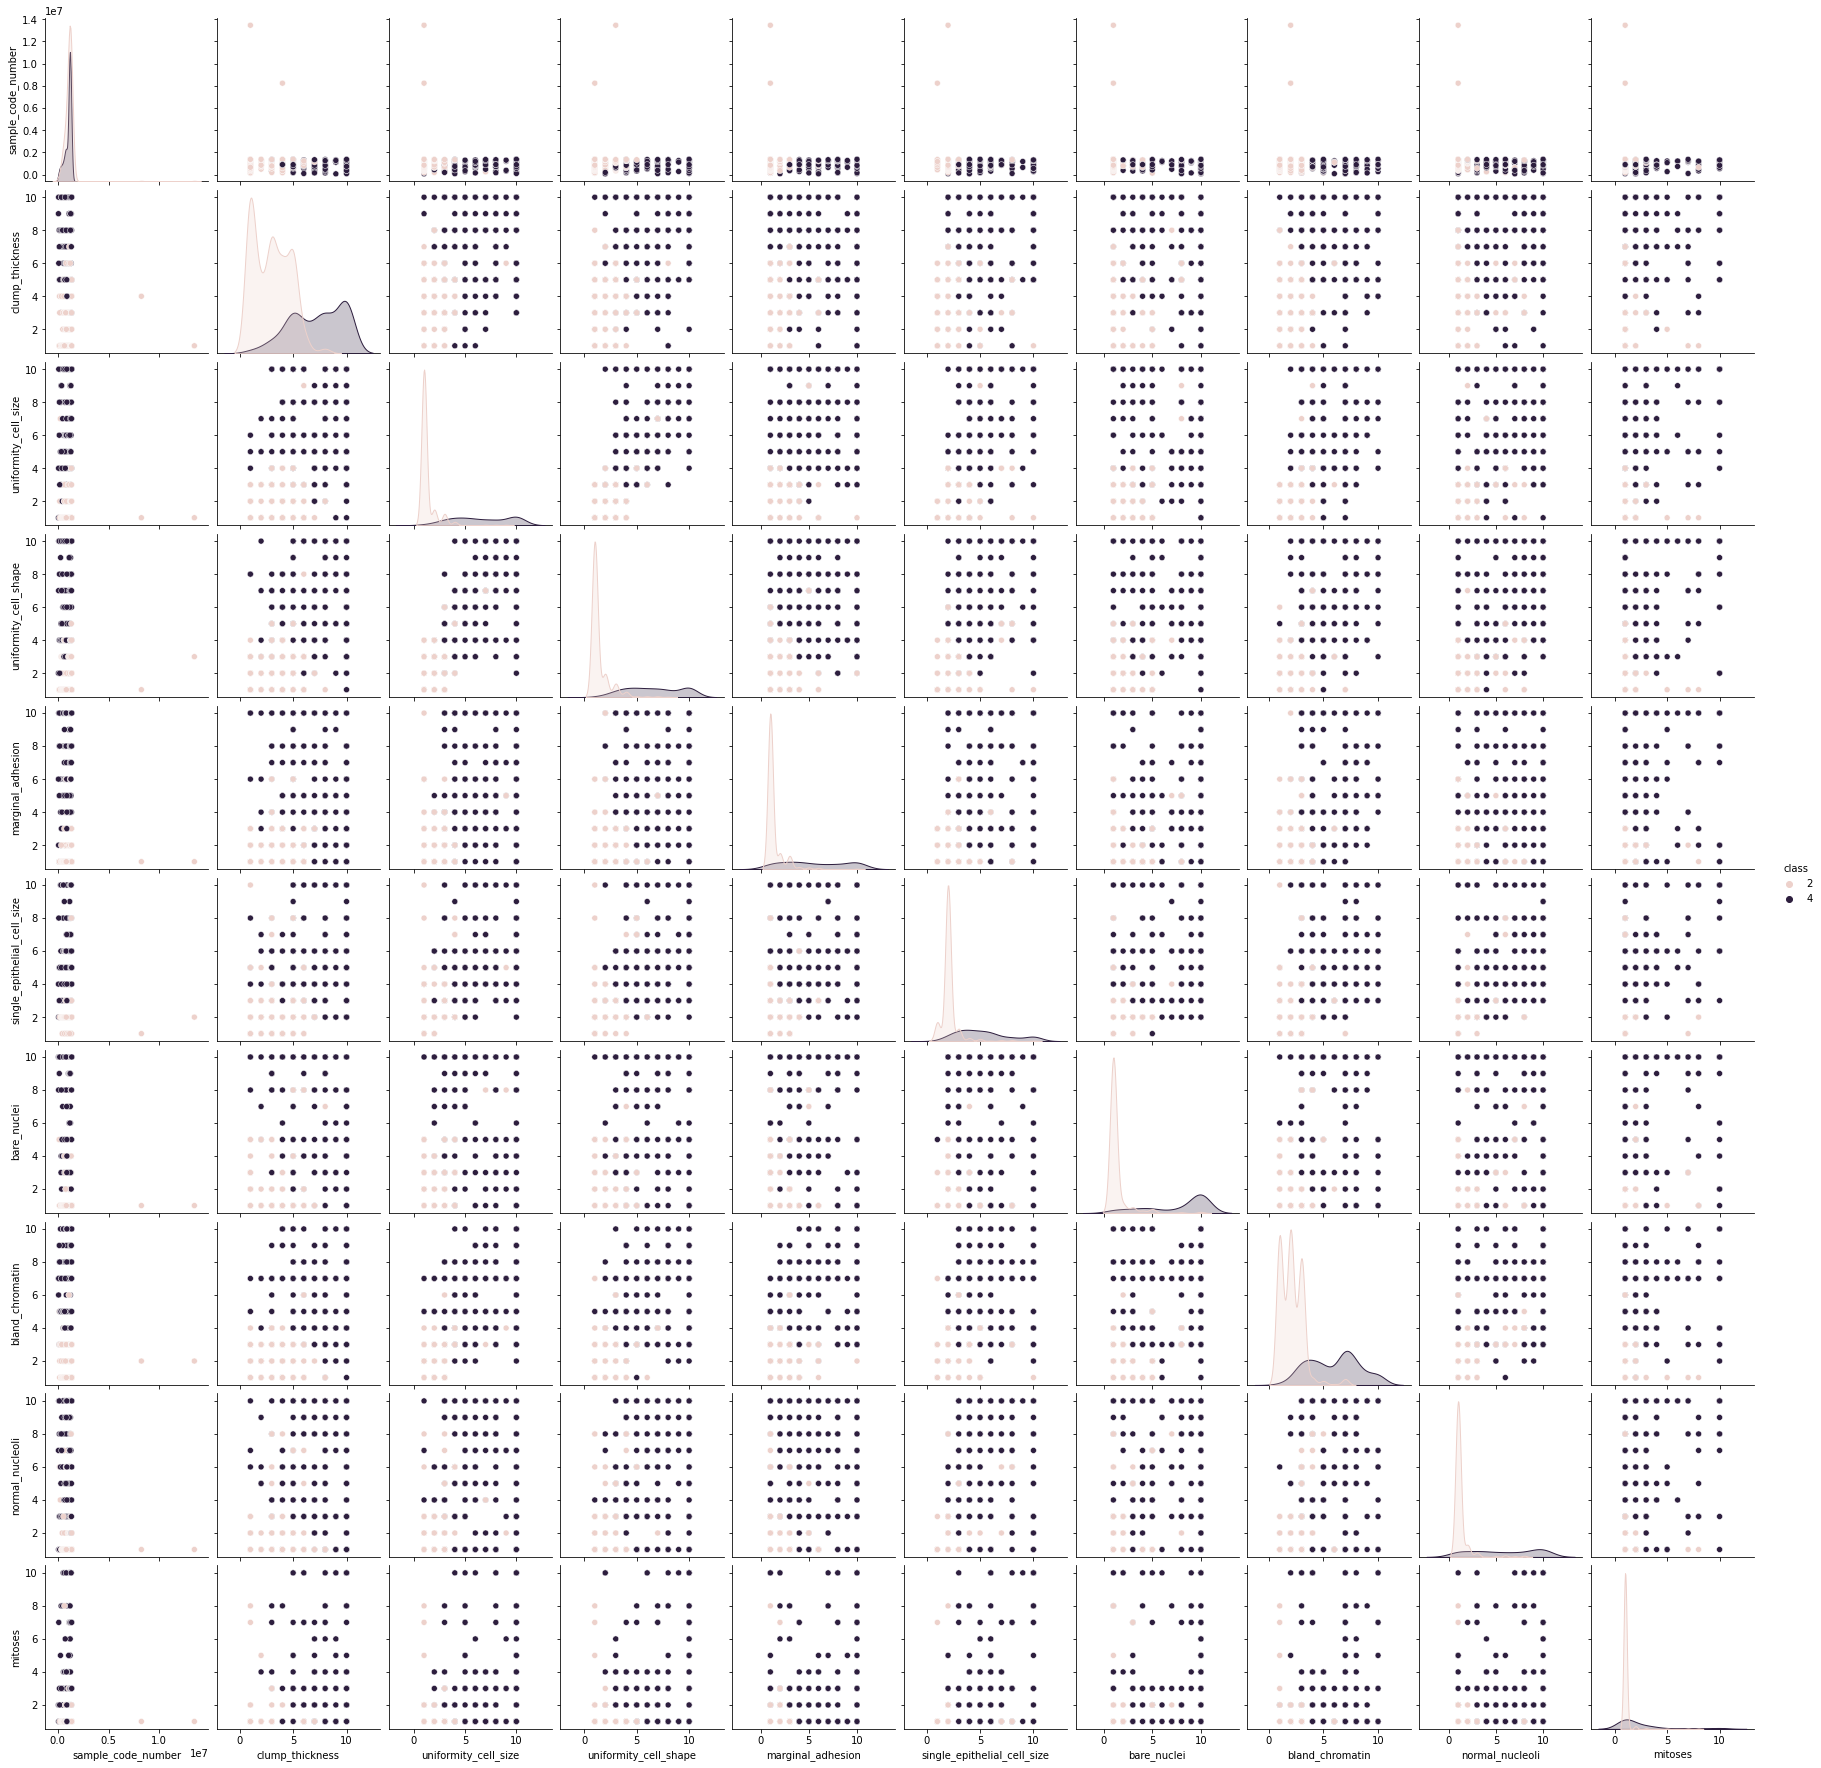

In [20]:
sns.pairplot(bcancer, hue='class')

In [182]:
feature_cols = ['clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses']
X = bcancer[feature_cols] 
y = bcancer['class'] 
logreg = LogisticRegression(C=1e9)
logreg.fit(X, y)

(683, 9)

(683,)

In [183]:
display(X.shape,y.shape)

(683, 9)

(683,)

With the shape method we can see the count of rows and columns in the dataset. So now in X we have 683 rows with 9 columns, and in y we have 683 rows with the self-column.

In [184]:
# Split your data into training(80%) and testing data (20%) and use random_state=142

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=142)
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(546, 9)

(137, 9)

(546,)

(137,)

In [186]:
# Building the Logistic Regression model
logreg = LogisticRegression()

# fiting the model with data
logreg.fit(X_train,y_train)

LogisticRegression()

In [189]:
# Doing predictions on test set
y_pred=logreg.predict(X_test)

In [169]:
y_pred

array([2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2,
       2, 4, 2, 4, 4])

### Evaluation

To evaluate a classification model we want to look at how many cases were correctly classified and how many
were in error.  In this case we have two outcomes - benign and malignant.   SKlearn has some useful tools, the 
[accuracy_score]() function gives a score from 0-1 for the proportion correct.  The 
[confusion_matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) function 
shows how many were classified correctly and what errors were made.  Use these to summarise the performance of 
your model (these functions have already been imported above).

In [188]:
accuracyScore = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score : ', accuracyScore)
print('Accuracy In Percentage : ', int(accuracyScore*100), '%') 

Accuracy Score :  0.9635036496350365
Accuracy In Percentage :  96 %


Our accuracy was 96%.

In [190]:
# Evaluating the performance of my trained model
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[83,  2],
       [ 3, 49]])

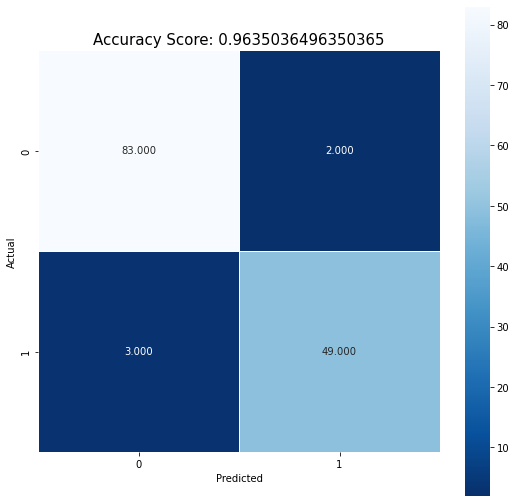

In [192]:
plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Here, we can see the confusion matrix in the form of an array object and graphical view.
 
Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.

The result is telling us that we have 83+49 correct predictions and 3+2 incorrect predictions.

TP = True Positives = 83

TN = True Negatives = 49

FP = False Positives = 3 

FN = False Negatives = 2 

**This is the checkpoint mark for this week's workshop. You need to report `Accuracy Score` on test set and also show `confusion matrix`. You also need to provide analysis based on the results you got.**

In [194]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.98      0.97        85
           4       0.96      0.94      0.95        52

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



### Feature Selection

Since you have many features available, one part of building the best model will be to select which features to use as input to the classifier. Your initial model used all of the features but it is possible that a better model can 
be built by leaving some of them out.   Test this by building a few models with subsets of the features - how do your models perform? 

This process can be automated.  The [sklearn RFE function](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) implements __Recursive Feature Estimation__ which removes 
features one by one, evaluating the model each time and selecting the best model for a target number of features.  Use RFE to select features for a model with 3, 4 and 5 features - can you build a model that is as good or better than your initial model?

In [165]:
feature_cols = np.array(['clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses'])
X = bcancer[feature_cols] 
y = bcancer['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=142)

In [168]:
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
selector = RFE(estimator, 4)  
selector = selector.fit(X, y)

supp = selector.get_support()
print("Selected features:", feature_cols[supp])
print("Coeffs:", selector.estimator_.coef_)
# test the model
predicted = selector.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

Selected features: ['clump_thickness' 'uniformity_cell_size' 'bare_nuclei' 'normal_nucleoli']
Coeffs: [0.06648831 0.09228477 0.10626051 0.05115854]
MSE: 0.1502005588935079
R^2: 0.8349285015509593


## Conclusion

Write a brief conclusion to your experiment.  You might comment on the proportion of __false positive__ and __false negative__ classifications your model makes.  How useful would this model be in a clinical diagnostic setting? 